# Typst


![thumbnail](https://github.com/user-attachments/assets/c9877b35-a0f3-4bbd-8de3-4a849292d0b3)


Table of Contents

1. Basic Equation
2. Function arguments
3. Integration Example
4. Using Color in Equations
5. More symbols
6. Accessing SVG
7. Code Block Rendering

Link to extension: https://extensions.blender.org/add-ons/typst-importer/


In [39]:
import typst
typst.__version__

'0.13.0'

In [40]:
# Import helper functions just for the docs
import runpy
module = runpy.run_path("/Users/jan-hendrik/projects/bpy-gallery/docs/render_utils.py")
globals().update(module) # adds fresh_scene(), render_result(), load_paper_background()
load_paper_background()

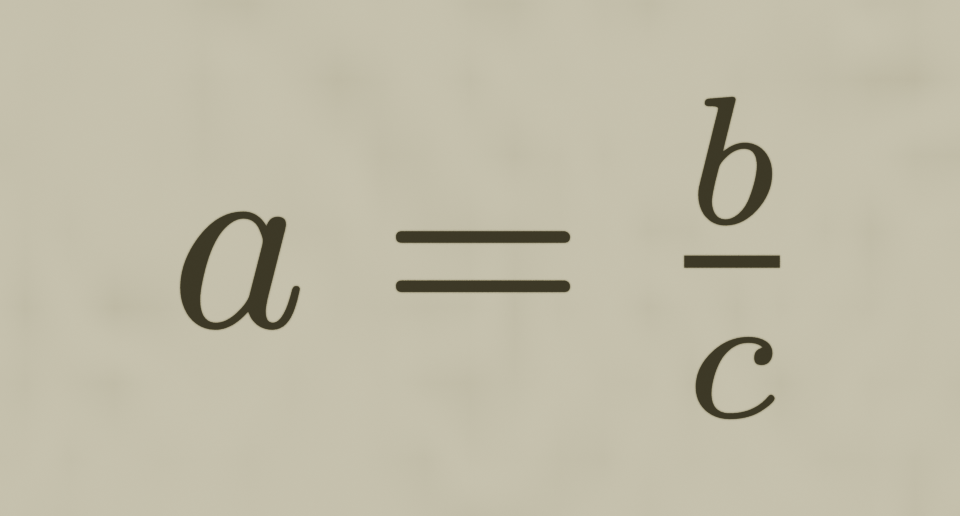

In [41]:
from typst_importer.typst_to_svg import typst_express
fresh_scene()

c = typst_express(
    "$ a = b/c$",
)
render_result(collection=c)

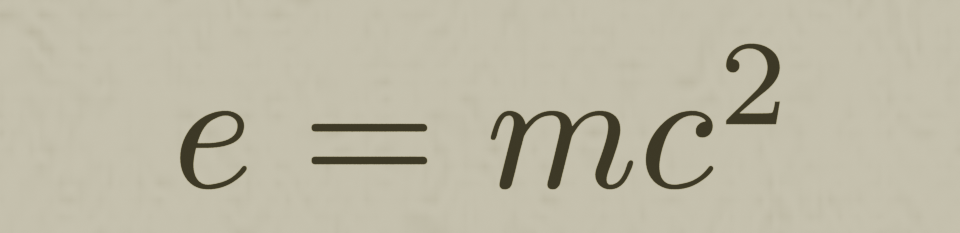

In [42]:
fresh_scene()
c = typst_express(
    "$ e = m c^2$",
    scale_factor=300,
    join_curves=True, 
    origin_to_char=False,
    name="Einstein's Equation"
)
render_result(collection=c)

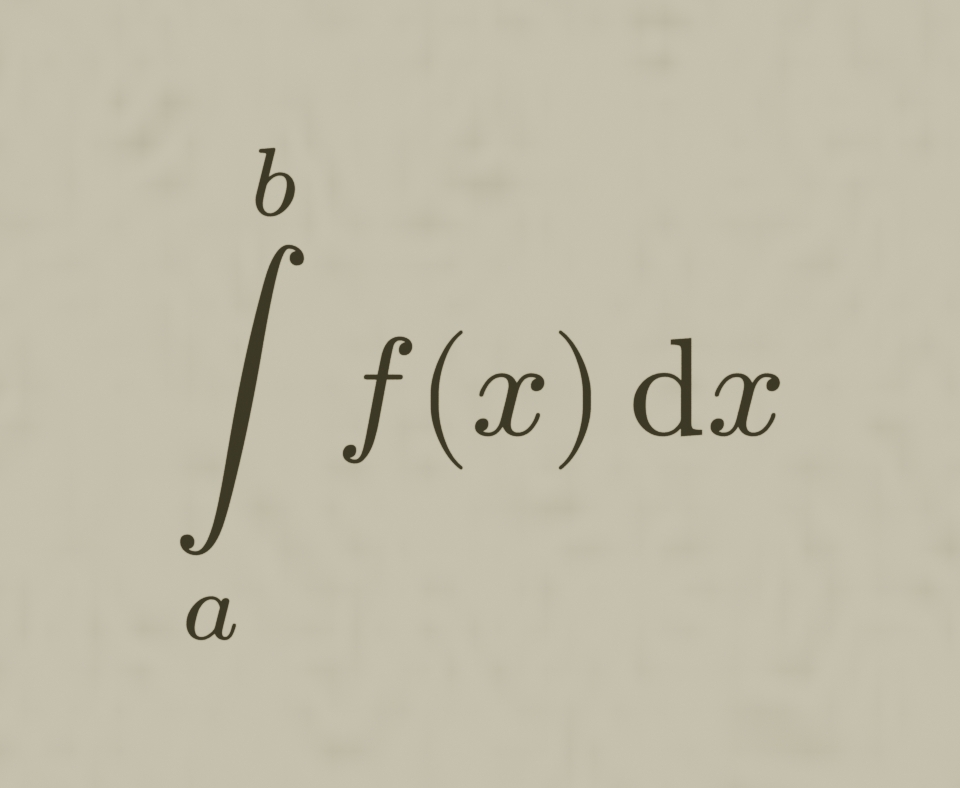

In [43]:
fresh_scene()
content = "$ limits(integral)_a^b f(x) dif x $" 
c = typst_express(content, join_curves=True, name="Integral")
render_result(collection=c)

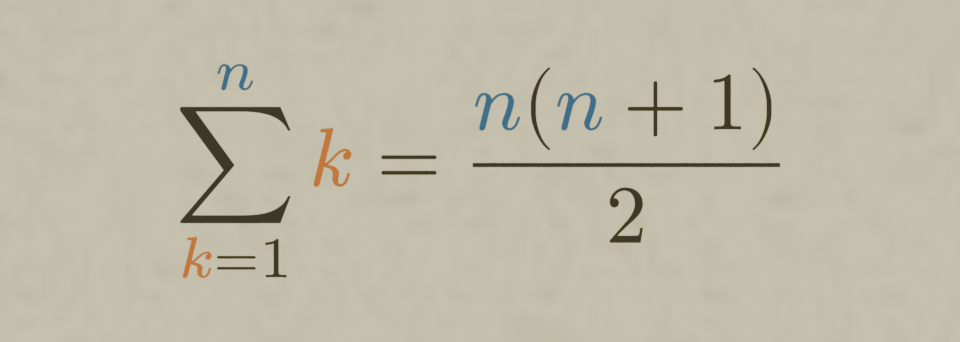

In [44]:
fresh_scene()
c = typst_express("""
#let korange() = text(fill: orange)[$k$]
#let nblue() = text(fill: blue)[$n$]
$ sum_(#korange() = 1)^#nblue() #korange() = (nblue()(nblue()+1)) / 2 $  
""")
render_result(collection=c, width="600pt")

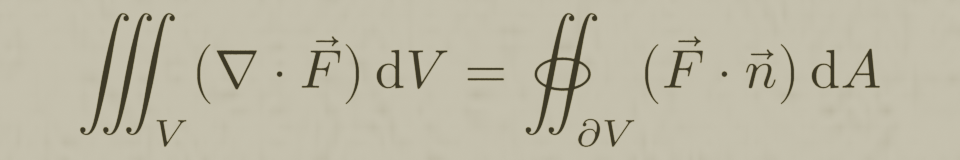

In [45]:
fresh_scene()
content = """
#set math.lr(size: 80%)
$ integral.triple _V (nabla dot accent(F, arrow)) dif V = integral.surf_(partial V)  (accent(F, arrow) dot accent(n, arrow)) dif A $
"""
c = typst_express(content)
render_result(collection=c , padding_factor=-0.4, width="1200pt")

In [46]:
from typst_importer.notebook_utils import display_svg
print(f"...{c.processed_svg[490:550]}...")
display_svg(c.processed_svg, width="400pt")

...="#000000" fill-rule="nonzero"><path d="M 83.55 68.05 C 81.2...


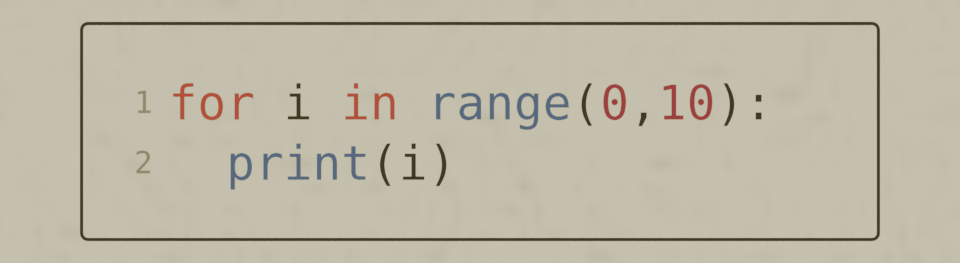

In [47]:
fresh_scene()   
c = typst_express("""
#set page(width: 500pt, height: auto, margin: 0cm, fill: none)

#import "@preview/codelst:2.0.2": sourcecode
#import "@preview/tablex:0.0.8": tablex
#let sourcecode = sourcecode.with(frame: (code) => block(
  radius: 5pt,
  stroke: 2pt + luma(0),
  inset: 30pt,
  text(size: 30pt, code)
))

#sourcecode[```python
for i in range(0,10):
  print(i)
```]
""")
render_result(collection=c, padding_factor=-0.4, width="900pt")

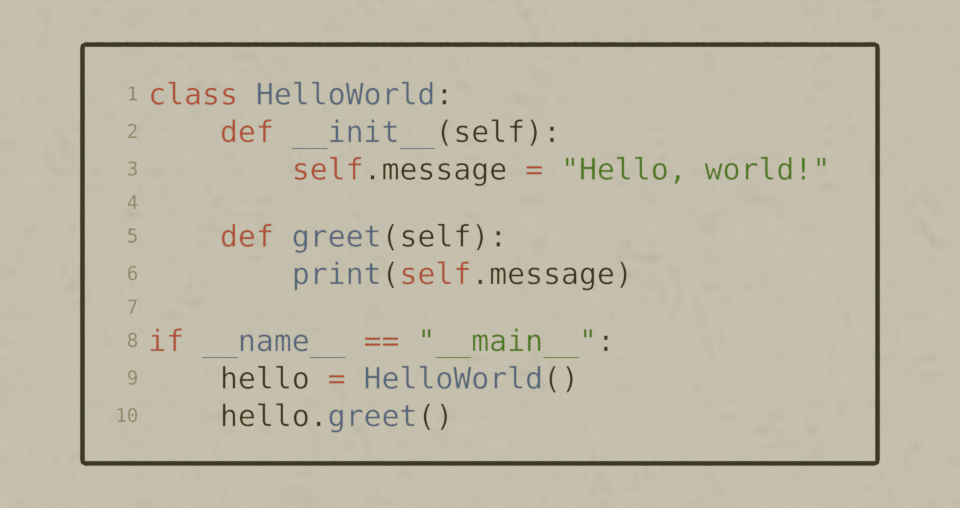

In [48]:
fresh_scene()
content = """
#set page(width: 800pt, height: auto, margin: 0cm, fill: none)

#import "@preview/codelst:2.0.2": sourcecode
#import "@preview/tablex:0.0.8": tablex

#let sourcecode = sourcecode.with(frame: (code) => block(
  radius: 5pt,
  stroke: 5pt + luma(0),
  inset: 30pt,
  text(size: 30pt, code)
))

#sourcecode[```python

class HelloWorld:
    def __init__(self):
        self.message = "Hello, world!"

    def greet(self):
        print(self.message)

if __name__ == "__main__":
    hello = HelloWorld()
    hello.greet()
```]
"""
c = typst_express(content)
render_result(collection=c , padding_factor=-0.4, width="900pt")

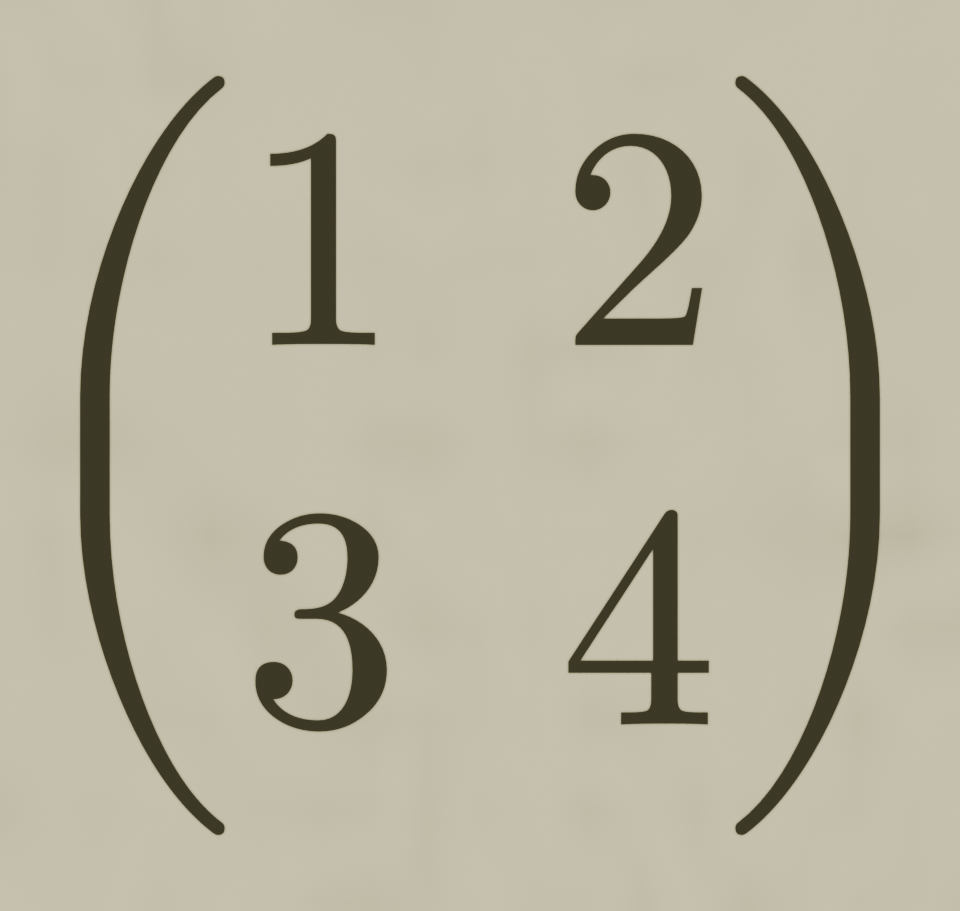

In [49]:
fresh_scene()
content = """
#set math.lr(size: 80%)
$ mat(1, 2; 3, 4) $"""
c = typst_express(content)
render_result(collection=c , padding_factor=-0.4, width="200pt")

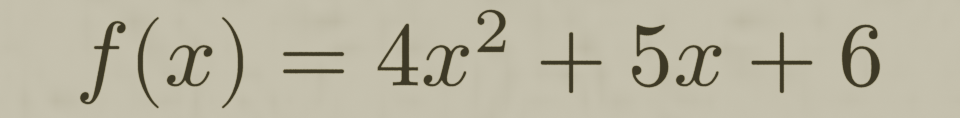

In [50]:
fresh_scene()
content = """
$ f(x) = 4x^2 + 5x + 6 $
"""
c = typst_express(content)
render_result(collection=c , padding_factor=-0.4, width="200pt")

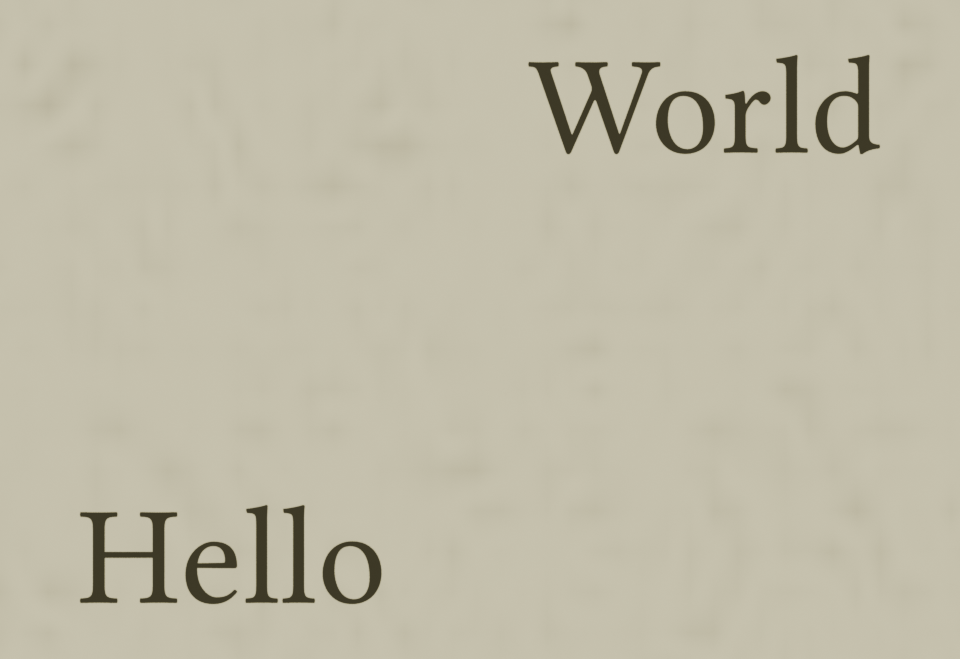

In [52]:
fresh_scene()
eq1 = """
Hello
"""

eq2 = """
World
"""

c1 = typst_express(
    eq1,
    origin_to_char=True,
    name="Term1",
    position=(0, 0, 0),  # Place at origin
)

c2 = typst_express(
    eq2,
    origin_to_char=True,
    name="Term2",
    position=(2, 2, 0),  # Place 2 units to the right
)

# join the two collections
if c1 and c2:
    for obj in c2.objects:
        c1.objects.link(obj)
        c2.objects.unlink(obj)
    bpy.data.collections.remove(c2)

render_result(collection=c1 , padding_factor=-0.4, width="200pt")

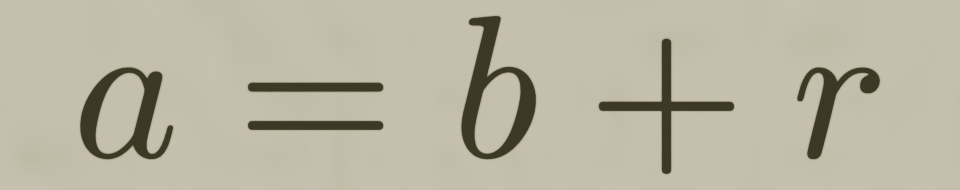

In [56]:
fresh_scene()

eq = """
#set text(black)
$ a = b + r $
"""
c = typst_express( eq, origin_to_char=True, name="Term1")
render_result(collection=c , padding_factor=-0.4, width="200pt")

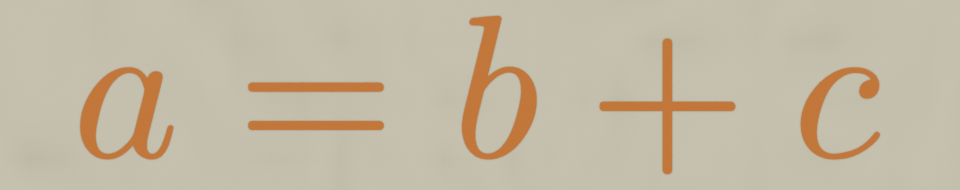

In [57]:
fresh_scene()

eq = """
#set text(orange)
$ a = b + c $
"""
c = typst_express( eq, origin_to_char=True, name="Term2")
render_result(collection=c, padding_factor=-0.4, width="200pt")